# Trabajo Práctico: Red Neuronal Lineal 🧠🐕
---

* **Objetivo:** resolver el problema del Transfer Learning aplicado sobre
 los pesos pre-entrenados del modelo EfficientNet-b3 para que resuelva una base de datos nueva, no vista durante el entrenamiento.







**Nombre del grupo:**  <span style="background-color: #511661; color: white; padding: 2px 6px; border-radius: 3px;">LU: labubus unidos</span>

<u>Participantes:</u>
* Boismoreau Ana Luz, 1035/23
* Lanabere Delfina Daniela, 246/24
* Lima Alessia Lourdes, 33/24
* Mazzei Agustin, 1183/22

El dataset $\mathcal{H}$ está compuesto por fotografías que forman parte de dos categorías: perros y gatos. El set completo contiene 3.000 imágenes de entrenamiento y 2.000 imágenes de test o validación.

Podemos representar el cuerpo del modelo EfficientNet-b3 como una función no lineal $b$ tal que al pasarle como entrada una imagen $I_i$ genera un embedding de salida $\mathbf{x}_i$:

$$b(I_i) = \mathbf{x}_i, \quad \forall I_i \in \mathcal{H}, \quad \mathbf{x}_i \in \mathbb{R}^{1536}$$

Cada imagen $I_i$ tiene asociada la clase correspondiente al animal, generando una tupla $(I_i, t)$ con $t \in \{0, 1\}$. Por simplicidad, vamos a agregar la clase del animal a la imagen $y$ al embedding como un supra-índice tal que quede:

$$b(I_i^t) = \mathbf{x}_i^t, \quad \forall I_i^t \in \mathcal{H}, \quad \mathbf{x}_i^t \in \mathbb{R}^{1536}, \quad t \in \{0, 1\}$$

La tarea de transfer learning, o finetunning, consiste en reemplazar la capa head del fully connected $W$ por una nueva matriz $W_{ft}$ tal que:

$$W_{ft} \mathbf{x}_i^t = \mathbf{e}_t$$

donde $\mathbf{e}_t$ es un vector canónico con todos valores igual a cero, excepto en el índice $t$ que tiene valor 1.


---
En nuestro trabajo, a partir de los algoritmos de distintas factorizaciones matriciales, pudimos hallar distintas matrices W. Entre ellos se encuentran:

1. **pinvEcuacionesNormales(X, L, Y_train)**:

como la matriz X_train es de rango completo, con una dimensión de 1536x2000, optamos por la versión (b) del algoritmo para hallar etc


2. **pinvSVD(U, S, V, Y_train)**:

Recordamos que la pseudoInversa de una matriz a partir de su SVD, es trasponer la matriz original y, para los elementos de Sigma, escribir el valor inverso de cada uno

3. **pinvHouseHolder(Q_hh, R_hh, Y_train)**:

En el caso de las descomposiciones QR, resolvimos ambas de distinta manera puesto que en la versión HouseHolder nos dio R una matriz rectangular


4. **pinvGramSchmidt(Q_gs, R_gs, Y_train)**:

En este caso, R nos dio una matriz cuadrada inversible. Por eso optamos por este algoritmo más reducido


A continuación se hablará de los resultados de estas W:


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# <u>Cargar los Datos</u>
* X_val
* Y_val
* los pesos W de cada método
* los Tiempos de Ejecución calculados en el archivo alc.py

In [6]:
# Cargar los Datos

def cargarDataset(carpeta):
    ruta_base = os.path.join(carpeta, 'cats_and_dogs')

    # Cargarmos X_val 
    val_cats = np.load(os.path.join(ruta_base, 'val', 'cats', 'efficientnet_b3_embeddings.npy'))
    val_dogs = np.load(os.path.join(ruta_base, 'val', 'dogs', 'efficientnet_b3_embeddings.npy'))

    X_val = np.hstack([val_cats, val_dogs])

    # Cargamos Y_val
    Y_val = np.array([[0] * 500 + [1] * 500, [1] * 500 + [0] * 500])

    # Cargamos los pesos W creados en el archivo alc.py
    W_en = np.load(os.path.join(carpeta,'W_en.npy'))
    W_svd = np.load(os.path.join(carpeta,'W_svd.npy'))
    W_hh = np.load(os.path.join(carpeta,'W_hh.npy'))
    W_gs = np.load(os.path.join(carpeta,'W_gs.npy'))

    t1 = np.load(os.path.join(carpeta,'t1.npy'))
    t2 = np.load(os.path.join(carpeta,'t2.npy'))
    t3 = np.load(os.path.join(carpeta,'t3.npy'))

    return X_val, Y_val, W_en, W_svd, W_hh, W_gs , t1, t2, t3


carpeta = ('dataset')
X_val, Y_val, W_en, W_svd, W_hh, W_gs, t1, t2, t3 = cargarDataset(carpeta)


# <u>Matrices de Confusión</u>
* Graficamos las cuatro matrices de confusión en conjunto


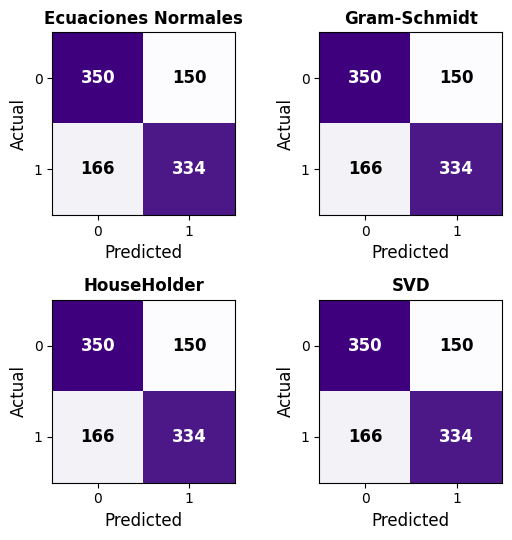

Notamos una gran similitud en cada una


In [9]:
# Función que grafica todas las matrices de confusión juntas

Y_pred_en = W_en @ X_val  # dejamos @ en lugar de nuestra función ProdMatricial por temas de tiempos
Y_pred_gs = W_gs @ X_val
Y_pred_hh = W_hh @ X_val
Y_pred_svd = W_svd @ X_val

# Convertir Y_val a etiquetas 
Y_val_labels = np.argmax(Y_val, axis=0)

# Convertir Y_pred en etiquetas 
Y_pred_en_class = np.argmax(Y_pred_en, axis=0)
Y_pred_gs_class = np.argmax(Y_pred_gs, axis=0)
Y_pred_hh_class = np.argmax(Y_pred_hh, axis=0)
Y_pred_svd_class = np.argmax(Y_pred_svd, axis=0)

# Armamos la matriz de confusión como un gráfico que lleva cuatro matrices 
fig, axes = plt.subplots(2, 2, figsize=(5.5, 5.5))
axes = axes.flatten()

metodos = [
    (Y_pred_en_class, "Ecuaciones Normales"),
    (Y_pred_gs_class, "Gram-Schmidt"),
    (Y_pred_hh_class, "HouseHolder"),
    (Y_pred_svd_class, "SVD")
]

for idx, (pred_class, nombre) in enumerate(metodos):

    classes = ['0', '1']
    cm = np.zeros((2, 2), dtype=int)

    # Personalizamos cada celda, sus colores, valores, entre otros
    
    for actual, pred in zip(Y_val_labels, pred_class):
        cm[int(actual)][int(pred)] += 1
    
    im = axes[idx].imshow(cm, cmap="Purples")

    for i in range(2):
        for j in range(2):
            axes[idx].text(j, i, str(cm[i, j]),
                          ha="center", va="center",
                          color="white" if cm[i, j] > cm.max()/2 else "black",
                          fontsize=12, fontweight='bold')

    # Personalizamos los ejes, sus nombres y el título de cada matriz 
    axes[idx].set_xticks(np.arange(2))
    axes[idx].set_yticks(np.arange(2))
    axes[idx].set_xticklabels(classes)
    axes[idx].set_yticklabels(classes)
    
    axes[idx].set_xlabel("Predicted", fontsize=12)
    axes[idx].set_ylabel("Actual", fontsize=12)
    axes[idx].set_title(nombre, fontsize=12, fontweight='bold')
    
    axes[idx].set_aspect('equal', 'box')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()


print("Notamos una gran similitud en cada una")

# <u>Tabla de Performance</u> 
* t1: Tiempo de Ejecución en minutos de las descomposiciones Cholesky, QR con HouseHolder, QR con Gram-Schmidt y SVD
* t2: Tiempo de Ejecución en minutos de las funciones para hallar la pseudoInversa según cada método
* t3: Tiempo de Ejecución total para cada método, en segundos

Observamos una gran distinción entre cada tiempo, por ende lo agregamos a nuestra tabla que compara estos valores de performance 
Presentamos los valores de las métricas, Exactitud, Precisión y Recall, además de estos tiempos que consideramos notables

In [11]:
def mostrar_metricas_comparativas(Y_val_labels, metodos, t1, t2, t3):
    print("COMPARACIÓN DE MÉTODOS")
    print("="*100)
    print(f"{'Método':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'T. Sin Pinv':<12} {'T. Pinv':<12} {'T. Total':<12}")
    print("-"*100)

    i = -1
    for pred_class, nombre in metodos:
        i += 1
        
        # Volvemos a calcular nuestra matríz de confusión 
        cm = np.zeros((2, 2), dtype=int)
        for actual, pred in zip(Y_val_labels, pred_class):
            cm[int(actual)][int(pred)] += 1
        
        TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
        
        # Métricas a considerar 
        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100 if (TP + TN + FP + FN) > 0 else 0
        precision = TP / (TP + FP) * 100 if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) * 100 if (TP + FN) > 0 else 0
        
        # Tiempos
        tiempo1 = float(t1[i])
        tiempo2 = float(t2[i])
        tiempo3 = float(t3[i])

        print(f"{nombre:<20} {accuracy:>10.2f} {precision:>10.2f} {recall:>8.2f} {t_sin_pinv:>12.2f} {t_pinv:>8.2f} {t_total:>9.2f}")

# Mostramos una comparación de Exactitud, Recall y Precisión, la cual es la misma
# Además de los tiempos de ejecución en minutos !!

mostrar_metricas_comparativas(Y_val_labels, metodos, t1, t2, t3)

COMPARACIÓN DE MÉTODOS
Método               Accuracy   Precision  Recall     T. Sin Pinv  T. Pinv      T. Total    
----------------------------------------------------------------------------------------------------
Ecuaciones Normales       68.40      69.01    66.80         0.91     0.50      1.41
Gram-Schmidt              68.40      69.01    66.80         0.18     1.06      1.24
Householder               68.40      69.01    66.80        42.93     0.23     43.16
SVD                       68.40      69.01    66.80       227.54    30.76    258.30


## Síntesis Final

A partir de nuestra Tabla de Resultados de Performance, podemos notar que los valores de métricas de *Precisión, Recall y Exactitud* son similares para cada método, por no decir idénticos. Eso quiere decir que, al trabajar de esta manera robusta, pudimos llegar a un mismo resultado a pesar de saber que existe una mayor inestabilidad cuando se habla del método de descomposición QR con Gram-Schmidt a diferencia de HouseHolder, por ejemplo. 

Recordando que la métrica de *Exactitud*  habla de la cantidad de resultados válidos cada 100 muestras, que sea del 68% nos dice que el nivel de rendimiento es moderado. La *Precisión* nos habla de cuánto, entre los resultados Positivos, es realmente Positivo. En este caso, nos dio una Precisión de 68,4%. Es decir, cada 100 resultados denominados como Positivos, 68 realmente lo son y, el resto, son Falsos Positivos. Finalmente, un *Recall* de 68,4% habla de la cantidad de valores exactos que no se le “escapan” al modelo. En nuestro caso, de cada 100 elementos de una clase, el 68,4% es detectado como parte de su propia clase.
Los cuatro parecen ser modelos con métricas balanceadas que superan el 50%, es decir, no trabajan al azar. Pero no son valores que nos permitan diferenciar a un método de otro. Para ello, elegimos una gran diferencia que tienen los métodos, la cual es el ***tiempo de ejecución.***


Sabíamos que las funciones de los Módulos del Laboratorio pasaban los test dados, los cuales presentaban matrices de tamaño no mayor a $R^{4 \times 4}$ , entonces nos dimos cuenta que habían funciones que afectaban el tiempo de ejecución de nuestras funciones para hallar W. Por ejemplo, la función auxiliar **ProdMatricial(A, B)** multiplica matrices elemento a elemento, lo cual es demasiado lento para matrices de tamaño $R^{1536 \times 2000}$. Entre las soluciones pensadas al respecto están la función **ProdMatricialBloques(A, B, block_size=n)** o el uso de "@".


**pinvSVD(U, S, V, Y_train)** tiene un tiempo de ejecución de _258.30 min_, a diferencia de **pinvEcuacionesNormales(X, L, Y_train)** que tarda _1.41 min_.  Esa es una diferencia entre cada función, y la que más impactó al trabajo: el tiempo de ejecución, lo cual es consecuencia del tiempo que tardó en ejecutar cada descomposición. **pinvSVD(U, S, V, Y_train)** utiliza la función SVD que llama a las funciones de DiagRh y MetPot, las cuales llevan 1000 iteraciones cada una. Por otro lado, para el caso de **pinvEcuacionesNormales(X, L, Y_train)** pudimos apresurar algunos pasos solucionando operaciones más pequeñas. 

Finalmente, agregamos un gráfico que compara estos tiempos. Nos pareció interesante visualizarlos
* T. Sin Pinv: cuánto tardó cada función de descomposición
* T. Pinv: cuánto tardó la función pinv (sin contar la descomposición)
* T. Total: tiempo total del ejercicio (suma de los dos tiempos anteriores) 

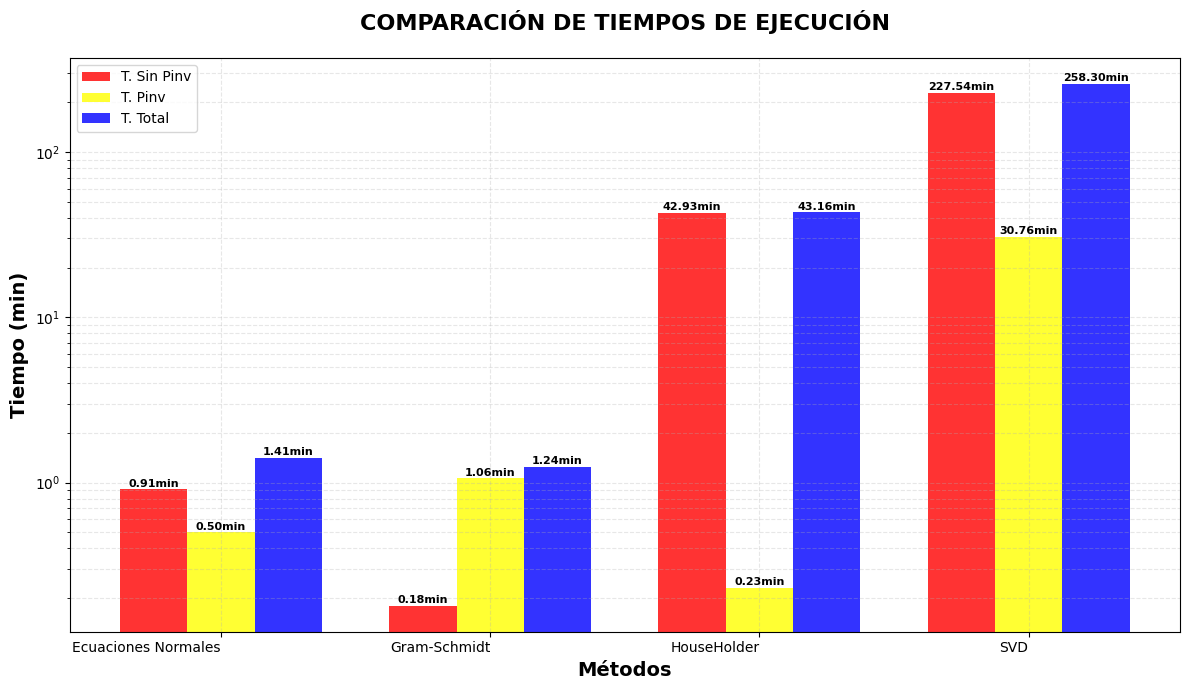

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
metodos = ['Ecuaciones Normales', 'Gram-Schmidt', 'HouseHolder', 'SVD']
tiempo_sin_pinv = [0.91, 0.18, 42.93, 227.54]
tiempo_pinv = [0.50, 1.06, 0.23, 30.76]
tiempo_total = [1.41, 1.24, 43.16, 258.3]

# Grafico que compara los tiempos de cada función 
plt.figure(figsize=(12, 7))
x = np.arange(len(metodos))
ancho = 0.25

bars1 = plt.bar(x - ancho, tiempo_sin_pinv, ancho, label='T. Sin Pinv', color='red', alpha=0.8)
bars2 = plt.bar(x, tiempo_pinv, ancho, label='T. Pinv', color='yellow', alpha=0.8)
bars3 = plt.bar(x + ancho, tiempo_total, ancho, label='T. Total', color='blue', alpha=0.8)

plt.yscale('log')

plt.title('COMPARACIÓN DE TIEMPOS DE EJECUCIÓN', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Métodos', fontsize=14, fontweight='bold')
plt.ylabel('Tiempo (min)', fontsize=14, fontweight='bold')
plt.xticks(x, metodos, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, which='both', linestyle='--')

for i, (t1, t2, t3) in enumerate(zip(tiempo_sin_pinv, tiempo_pinv, tiempo_total)):
    offset = 0.1 
    plt.text(i - ancho, t1 * 1.01, f'{t1:.2f}min', 
             ha='center', va='bottom', fontsize=8, fontweight='bold')
    plt.text(i, t2 * 1.01, f'{t2:.2f}min', 
             ha='center', va='bottom', fontsize=8, fontweight='bold')
    plt.text(i + ancho, t3 * 1.01, f'{t3:.2f}min', 
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.95)
plt.tight_layout()
plt.show()